# Lecture 31: Simulated Annealing

## Overview

Expanding over the Threshold Accepting algorithm, the Simulated Annealing algorithm probabilistically accepts worse solutions to escape local optima traps in search of high-quality solutions. Specifically, the algorithm takes inspiration from the annealing process in metallurgy, wherein a material is first heated and then slowly cooled down, reaching a stable state. Analogous to this process, the Simulated Annealing algorithm initialises the search at a sufficiently high temperature – $T_0$, and then cools down the search to temperature T_k in k^th iteration of the algorithm, based on the cooling schedule – $T$. These cooling schedules can include linear cooling – $T_k=T_0-θk$, exponential cooling – $T_k=T_0 θ^k$, logarithmic cooling – $T_k=T_0/log⁡(k+1)$, and even adaptive cooling, wherein the temperature increases/decreases dynamically based on search progress. Hence, in the Simulated Annealing algorithm, it is the cooling schedule that is responsible for managing exploration and exploitation of the search space. Specifically, a slow cooling schedule will result in high exploration but low exploitation, while a fast cooling schedule will render low exploration but high exploitation. It is thus pertinent to select an appropriate cooling schedule that fits the nature of the problem and associated solution landscape.

The Simulated Annealing algorithm begins with an initial solution – $s_o$, which serves as the current solution – $s$, as well as the best solution – $s^*$. Hereafter, in each iteration the algorithm applies a defined set of transformations to the current solution defined by the neighbourhood – $N(s)$, to generate a new solution – $s'$. The algorithm accepts this new solution as the current solution based on an acceptance probability – $p$, which is a function of the objective function evaluation of the current solution – $f(s)$ and the new solution – $f(s)$. Specifically, the algorithm accepts a better new solution with probability $p=1$, and a worse new solution with a probability determined by the Boltzmann function – $p=\text{exp}⁡((f(s)-f(s'))/T_k)$. In addition, if this new solution is better than the best the solution, then the algorithm updates the best solution as well. Finally, in each iteration, the algorithm updates the temperature based on the cooling schedule. The algorithm iterates until it reaches a threshold level of solution quality or computation effort, returning the best solution in the end. 

Considering the ability of the Simulated Annealing algorithm to explore and exploit the search space and consequently develop high-quality solutions, it has found extensive use for optimisation problems in Transportation Engineering, including vehicle routing, dial-a-ride, service scheduling, traffic assignment, and vehicle navigation, listed in a decreasing order of algorithm utilisation.

---

## Pseudo Code

1. **Procedure** $\text{SA}(s_o, (N, T))$
2. $s ← s_o$ &emsp;<small>// initialise current solution $s$ as the initial solution $s_o$</small>
3. $s^* ← s$ &emsp;<small>// initialise best solution $s^*$ as the current solution</small>
4. $k ← 0$ &emsp;<small>// initialise iteration counter $k$ at zero</small>
5. $T ← T_k$ &emsp;<small>// initialise current temperature based on the cooling schedule $T$</small>
6. **while** $!\text{converged}$ **do** &emsp;<small>// repeat until converged</small>
7. &emsp;$s' {R \atop ←} N(s)$ &emsp;<small>// generate new random solution from neighborhood $N$ of the current solution</small>
8. &emsp;$\Lambda \sim U(0, 1)$ &emsp;<small>// generate a random number $\Lambda$ uniformly from $[0, 1]$</small>
9. &emsp;$\lambda {R \atop ←} \Lambda$ &emsp;<small>// draw a random value $\lambda$ from $\Lambda$</small>
10. &emsp;**if** $f(s') < f(s)$ **then** &emsp;<small>// if the new solution is better than the current solution</small>
11. &emsp;&emsp;$s ← s'$ &emsp;<small>// update the current solution to the new solution</small>
12. &emsp;**else if** $\lambda < \exp((f(s) - f(s')) / T)$ **then** &emsp;<small>// else accept the new solution with a small probability</small>
13. &emsp;&emsp;$s ← s'$ &emsp;<small>// update the current solution to the new solution</small>
14. &emsp;**end if**
15. &emsp;**if** $f(s) < f(s^*)$ **then** &emsp;<small>// if the current solution is better than the best solution</small>
16. &emsp;&emsp;$s^* ← s$ &emsp;<small>// update the best solution to the current solution</small>
17. &emsp;**end if**
18. &emsp;$k ← k + 1$ &emsp;<small>// update iteration counter</small>
19. &emsp;$T ← T_k$ &emsp;<small>// update current temperature based on the cooling schedule</small>
20. **end while**
21. **return** $s^*$ &emsp;<small>// return the best solution</small>

---

## Implementation

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def sa(s_o, N, T_o, r, n=100, t=1e-5):
    """
    Simulated Annealing Algorithm

    Parameters:
    - s_o: Initial solution
    - N: Neighborhood function
    - T_o: Initial tempertature
    - r: Cooling rate
    - n: Number of iterations
    - t: Convergence threshold

    Returns:
    - Current and Best solution found in each iteration
    """
    s = s_o        # Current solution
    s_b = s        # Best solution found
    S_c = [s_b]    # Track current solutions over iterations
    S_b = [s_b]    # Track best solutions over iterations

    T = T_o        # Initial temperature

    i = 1
    e = float('inf')
    converged = False
    while not converged:
      s_n = N(s)                      # Generate a random neighbor
      d = f(s_n) - f(s)               # Compute objective function difference

      if d < 0:                       # Accept if new solution is better
        s = s_n
      else:
        l = random.uniform(0, 1)      # Generate random value
        if l < np.exp(-d / T):        # Accept with probability based on temperature
          s = s_n

      if f(s) < f(s_b):               # Update best solution if improved
        e   = f(s_b) - f(s)
        s_b = s

      S_c.append(s)                   # Store best solution at each iteration
      S_b.append(s_b)                 # Store best solution at each iteration

      T *= r                          # Update temperature using cooling schedule

      i += 1
      if i >= n or e <= t:            # Convergence condition
        converged = True
 
    return S_c, S_b

---

## Case Study

### Ackley Function

Text(0.5, 0.92, 'Ackley Function Surface Plot')

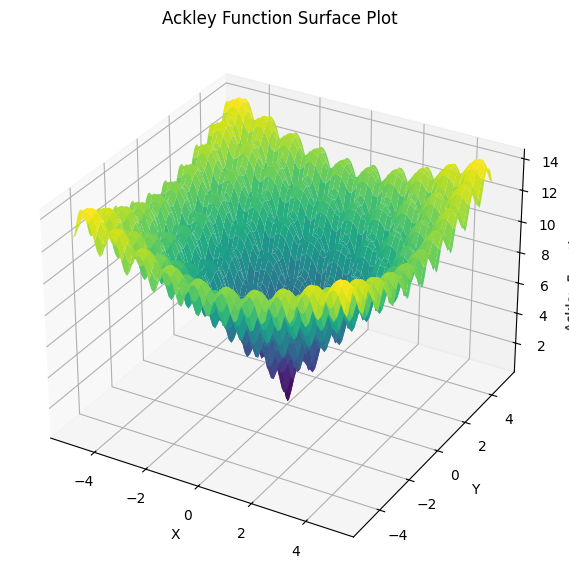

In [15]:
def f(s):
 """
 Computes the Ackley function for given solution s.

 Parameters:
 - s: Tuple of input coordinates

 Returns:
 - Function value at s
 """
 x, y = s
 return -20 * np.exp(-0.2 * np.sqrt((x**2 + y**2) / 2)) + -np.exp((np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)) / 2) + 20 + np.exp(1)

# Generate a grid of (x, y) values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([[f(s) for s in zip(r, c)] for r, c in zip(X, Y)])

# Plot the Ackley function
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Ackley Function Value")
ax.set_title("Ackley Function Surface Plot")

Best solution: [-0.005999259740756213, 0.007778296513867855]
Objective function value: 0.030351673237753563


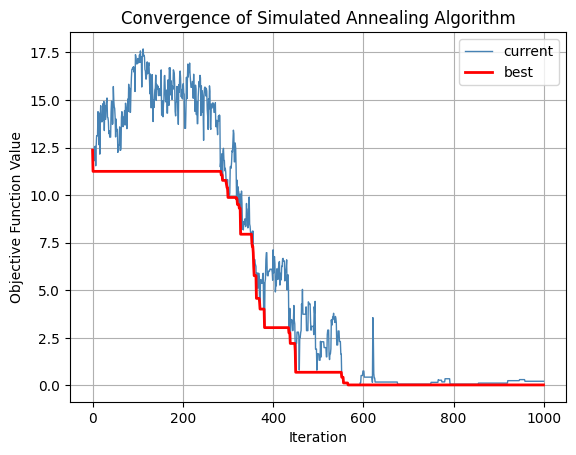

In [17]:
def N(s):
  x, y = s
  x += np.random.uniform(-0.5, 0.5)
  y += np.random.uniform(-0.5, 0.5)
  s = [x,y]
  return s

s_o = [random.uniform(-5, 5), random.uniform(-5, 5)]
S_c, S_b = sa(s_o, N, 10, 0.995, 1000, 1e-15)
F_c = [f(s) for s in S_c]
F_b = [f(s) for s in S_b]

# Report outcome
print("Best solution:", S_b[-1])
print("Objective function value:", f(S_b[-1]))

# Convergence plot
fig = plt.figure()
plt.plot(F_c, label='current', color='steelblue', linewidth=1)
plt.plot(F_b, label='best', color='red', linewidth=2)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Simulated Annealing Algorithm")
plt.grid()
plt.show()

Initial solution: [32, 14, 23, 45, 9, 0, 1, 44, 15, 19, 7, 25, 37, 26, 35, 10, 8, 29, 18, 20, 3, 40, 5, 38, 11, 13, 41, 16, 28, 22, 47, 4, 33, 12, 31, 17, 34, 24, 43, 39, 2, 46, 6, 30, 21, 27, 36, 42]
Best solution: [19, 32, 45, 35, 29, 42, 16, 26, 18, 36, 5, 27, 6, 17, 43, 30, 37, 7, 15, 21, 2, 0, 8, 39, 14, 11, 10, 22, 24, 13, 33, 40, 28, 1, 25, 3, 34, 44, 9, 23, 41, 4, 47, 38, 31, 20, 12, 46]
Objective function value: 34928.604959520155


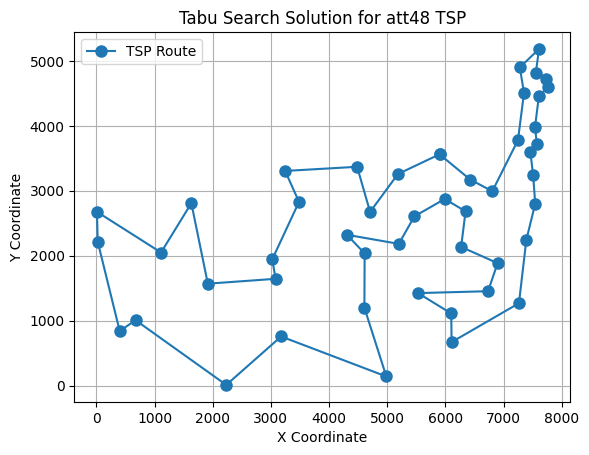

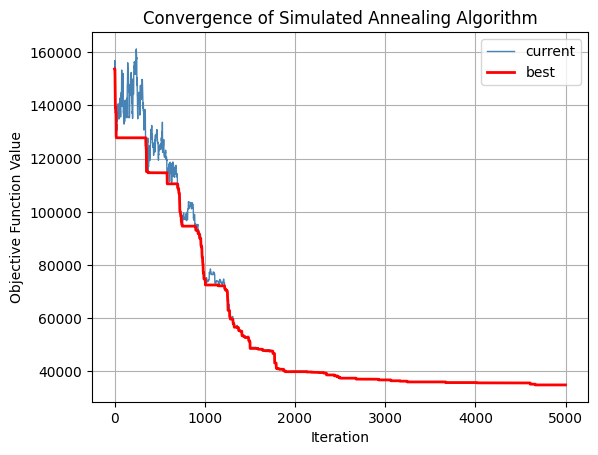

In [19]:
import random
import matplotlib.pyplot as plt

# Nodes
C = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
X = [6734, 2233, 5530, 401, 3082, 7608, 7573, 7265, 6898, 1112, 5468, 5989, 4706, 4612, 6347, 6107, 7611, 7462, 7732, 5900, 4483, 6101, 5199, 1633, 4307, 675, 7555, 7541, 3177, 7352, 7545, 3245, 6426, 4608, 23, 7248, 7762, 7392, 3484, 6271, 4985, 1916, 7280, 7509, 10, 6807, 5185, 3023]
Y = [1453, 10, 1424, 841, 1644, 4458, 3716, 1268, 1885, 2049, 2606, 2873, 2674, 2035, 2683, 669, 5184, 3590, 4723, 3561, 3369, 1110, 2182, 2809, 2322, 1006, 4819, 3981, 756, 4506, 2801, 3305, 3173, 1198, 2216, 3779, 4595, 2244, 2829, 2135, 140, 1569, 4899, 3239, 2676, 2993, 3258, 1942]

# Arcs
A = np.zeros((48, 48))
for i in range(48):
    for j in range(48):
        A[i][j] = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)

# Compute total route cost
def f(s):
    c = A[s[-1]][s[0]]
          
    for i in range(len(s)-1):
        c += A[s[i]][s[i+1]]
    
    return c

# Generate 2-opt neighborhood
def N(s):
    s    = s.copy()
    i, j = sorted(random.sample(range(len(C)), 2))
    s    = s[:i] + s[i:j+1][::-1] + s[j+1:]
    return s

# Simulating Annealing
s_o = random.sample(C, len(C))
S_c, S_b = sa(s_o, N, 1e4, 0.9975, 5000, 1e-15)
F_c = [f(s) for s in S_c]
F_b = [f(s) for s in S_b]


# Report outcome
s_b = S_b[-1]
print("Initial solution:", s_o)
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# TSP
s = s_b
x = [X[c] for c in s]
y = [Y[c] for c in s]
x.append(X[s[0]])
y.append(Y[s[0]])
plt.figure()
plt.plot(x, y, 'o-', markersize=8, label="TSP Route")
plt.title("Tabu Search Solution for att48 TSP")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()


# Convergence plot
fig = plt.figure()
plt.plot(F_c, label='current', color='steelblue', linewidth=1)
plt.plot(F_b, label='best', color='red', linewidth=2)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Simulated Annealing Algorithm")
plt.grid()
plt.show()
